<a href="https://colab.research.google.com/github/mateoart14/Curso2/blob/MateoArteagaReporte/Copia_de_S3_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado de Análisis de datos y Machine Learning en Python</h1>


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Pipeline**

Llamamos pipeline a una secuencia de procesamiento de datos que permite optimizar mi flujo de trabajo. Estos son comunes en machine learning pues no solo permiten la manipulación y transformación de multiples datos, sino que además tenemos una alta reducción en código. Este consiste en encadenar una serie de estimadores, que me permiten ir trasformando un conjunto de datos en un proceso comprendido por varias etapas de manera secuencial, donde cada componente del pipeline toma los datos, los trasforma y su salida va a la siguiente componente del pipeline, dandose esto hasta pasar por todas las componentes de éste. En estos tenemos ciertas ventajas como:

* **Selección conjunta de parámetros**: Tenemos facilidad de acceder a los parámetros usados en cada estimador.
* **Conveniencia y encapsulación**: Facilidad en la implementación del código, solo es necesario hacer uso del fit y predict, para pasar a través de los estimadores.
* **La seguridad**: No se pierde información en los datos que se tiene.

En **Sklearn** se cuenta con pipeline, el cual se construye usando parejas de (*key*,*value*), donde **key** será el nombre que le daremos a nuestro paso y **value** el estimador usado, el nombre puede ser cualquiera que deseemos. Todos los estimadores en un pipeline excepto el último deben ser transformadores(es decir deben tener un atributo .transform); el último puede ser de cualquier tipo(clasificación,regresión,transformación,etc.).

Veamos un ejemplo sencillo en el cual hacemos uso del **iris data set**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
data=load_iris()
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2)

In [ ]:
X_train.shape

(120, 4)

In [ ]:
X_test

array([[5.2, 2.7, 3.9, 1.4],
       [4.9, 3.1, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [7.4, 2.8, 6.1, 1.9],
       [6.3, 3.3, 4.7, 1.6],
       [6.6, 2.9, 4.6, 1.3],
       [4.4, 2.9, 1.4, 0.2],
       [5.8, 2.8, 5.1, 2.4],
       [6.2, 3.4, 5.4, 2.3],
       [6.1, 2.6, 5.6, 1.4],
       [4.9, 3.6, 1.4, 0.1],
       [5. , 3.5, 1.3, 0.3],
       [6.1, 2.8, 4.7, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [4.7, 3.2, 1.6, 0.2],
       [6.3, 2.9, 5.6, 1.8],
       [5.7, 2.8, 4.1, 1.3],
       [4.9, 3. , 1.4, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5. , 2.3, 3.3, 1. ],
       [5.1, 3.8, 1.6, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [5.1, 3.5, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [5.9, 3. , 4.2, 1.5]])

In [ ]:
y_train

array([1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 1,
       0, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 1,
       1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2,
       1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 2])

Hasta ahora solo se ha cargado los datos, y los estimadores que se usarán e nuestro proceso. Ahora veamos como se construye el pipeline. 

In [ ]:
model=Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=2)),('regl',LogisticRegression(random_state=42))])

In [ ]:
model

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('regl', LogisticRegression(random_state=42))])

Ya creamos nuestro modelo con ayuda de los pipeline, donde vemos se construyo de la forma en que se especifíco antes, donde tenemos tres estimadores, el primero escala mis variables,el segundo reduce la dimensión y el tercero realiza una regresión logistica. Nosotro podemos usar **make_pipeline**, el cual es una forma rápida de crear nuestro pipeline, pues no debemos poner el nombre de nuestro paso en él.

In [ ]:
model_2=make_pipeline(StandardScaler(),PCA(n_components=2),(LogisticRegression(random_state=42)))

In [ ]:
model_2

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=42))])

Donde se puede ver que haciendo uso de esta segunda forma para construir el pipeline, se asigna un nombre de forma automática a cada uno de los estimadores, en general es el nombre de este último en minúsculas. Podemos acceder a los estimadores de la siguiente forma

In [ ]:
model.steps[0]

('scaler', StandardScaler())

In [ ]:
model[0]

StandardScaler()

In [ ]:
model['regl']

LogisticRegression(random_state=42)

In [ ]:
model.set_params() #parámetros dentro de nuestro pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('regl', LogisticRegression(random_state=42))])

Ahora bien podemos entrenar, predecir y evaluar nuestros datos, en este caso el iris dataset, con la ayuda del pipeline que construímos haciendo uso de los siguientes atributos.

In [ ]:
model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('regl', LogisticRegression(random_state=42))])

In [ ]:
y_h=model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

0.9

## Ejercicio

Con ayuda del **pipeline** de sklearn, construir uno de forma tal qué, escale mis datos, reduzca mi dimensión(dimensión 2) y aplique un clasificador de arbol de decisión (DecisionTreeClassifier) al iris data set, donde a este último solo le pondremos como parámetro el **random_state=42**. Entrenarlo y evaluarlo.



In [ ]:

from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_ejercicio = Pipeline([('scaler', StandardScaler()),('pca',PCA(n_components=2)),('tree',DecisionTreeClassifier(random_state=42))])

In [ ]:
model_ejercicio.fit

<bound method Pipeline.fit of Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('tree', DecisionTreeClassifier(random_state=42))])>

In [ ]:
model_ejercicio.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('tree', DecisionTreeClassifier(random_state=42))])

In [ ]:
model_ejercicio.score(X_test,y_test)

0.9

Haga click **aquí** si tiene problemas con la solución:

<!-----
from sklearn.tree import DecisionTreeClassifier

model_3=Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=2)),('des_tree',DecisionTreeClassifier(random_state=42))])


1.   Elemento de la lista
2.   Elemento de la lista


model_3.fit(X_train,y_train)
model_3.score(X_test,y_test)
----->

## **Protocolo de validación**

Nuestro objetivo es tener modelos que nos permitan generalizar bien, esto es, que tengamos un buen comportamiento a la hora de predecir cuando tengamos nuevos datos, es decir, evitando el overfitting. En busqueda de esto, una parte principal es hacer una correcta elección del modelo y de los hiperparámetros, para esto es necesario tener una forma de **validar** que nuestro modelo e hiperparámetros están adapatandose bien a nuestros datos. Para esto tenemos ciertos protocolos que nos permiten realizar esto:

* Simple Hold-out validation
* k-fold cross-validation
* Iterated k-fold validation  with shuffling

#### **Simple Hold-out validation**
Basicamente consiste en dividir nuestros datos totales en dos conjuntos, uno el cual llamaremos conjunto de prueba (test set) y es una pequeña fracción de los datos totales; los datos restantes son los que me permitirán entrenar el modelo y es llamado nuestro conjunto de entrenamiento (train set).

<p><img alt="Colaboratory logo" height="200px" src="https://i.imgur.com/A6Gzf6M.png" align="center" hspace="10px" vspace="0px"></p>

 Veamos como se ve el hold-out validatión en acción, para esto usaremos el iris dataset y un k-neighbors clasiffier

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
iris=load_iris()

In [ ]:
X=iris.data
y=iris.target

In [ ]:
X1,X2,y1,y2=train_test_split(X,y,random_state=0,train_size=0.5) #Definimos el 50% de los datos para el conjunto de entrenamiento

In [ ]:
model=KNeighborsClassifier(n_neighbors=5)

In [ ]:
model.fit(X1,y1)
y2_h=model.predict(X2)
accuracy_score(y2,y2_h)

0.96

En lo anterior vemos que es básicamente lo que hacemos con nuestros modelos de forma usual. Acá tenemos una desventaja, es que parte de nuestros datos no son empleados a la hora de entrenar nuestro modelo, esto hace que perdamos información. Para evitar este tipo de cosas se emplea el siguiente protocolo.

#### **k-fold cross-validation**

Este conciste en dividir nuestros datos en **k** particiones de igual tamaño, donde cada una de las particiones se usará en entrenamiento y testeo de la siguiente manera, para cada partición "$i$", entrenamos el modelo con las restantes **k-1** particiones y lo evaluamos en la partición "$i$". El resultado final será el promedio de los **K** resultados obtenidos.

<p><img alt="Colaboratory logo" height="200px" src="https://i.imgur.com/8TV1oeN.png" align="center" hspace="10px" vspace="0px"></p>


Veamos como sería la implementación para el caso de 2-fold cross validation, es decir donde tenemos dos particiones.

In [ ]:
y2_model=model.fit(X1,y1).predict(X2)
y1_model=model.fit(X2,y2).predict(X1)
score=accuracy_score(y1,y1_model),accuracy_score(y2,y2_model)
print(score)

(0.9733333333333334, 0.96)


In [ ]:
import numpy as np
np.mean(score)

0.9666666666666667

La anterior sería una medida global de la realización del modelo. Si bien es facil de realizar para el caso antes visto, cuando tenemos un valor de **k** muy grande hacerlo de forma manual puede ser tedioso, sklearn tiene una rutina que nos permite hacerlo para diferentes **k**.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score=cross_val_score(model,X,y,cv=5)
print(score)

[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.97 (+/- 0.05)


Cuando aplicamos k-fold cross-validation multiples vecez, mezclando los datos antes de hacer la partición cada vez, es un protocolo conocido como **Iterated k-fold validation with shuffling**.

### **Ejercicio**

Realizar un **pipeline** en el cual se **escalen** mis datos del iris data set y luego se use el clasificador **k-neighbors clasiffier** para **n_neighbors=1**. Finalmente usar en el anterior el protocolo de **k-fold cross-validation** para k=5.

In [ ]:
pipe = Pipeline([('std', StandardScaler()),('kneigh', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
cross_val_score(pipe,X,y,cv=5)

array([0.93333333, 0.96666667, 0.93333333, 0.9       , 1.        ])

Haga click **aquí** si tiene problemas con la solución:

<!-----
pip=Pipeline([('stan',StandardScaler()),('kneig',KNeighborsClassifier(n_neighbors=1))])
cross_val_score(pip,X,y,cv=5)
----->

# Reto

Haga una red neuronal de 2 capas (2 neuronas ocultas y 1 de salida) usando únicamente numpy para ajustar el XOR usando la función escalera como función de activación. Tip: XOR=AND(OR,NAND)

In [ ]:
import numpy as np

In [ ]:
A1 = [0] * 2

In [ ]:
A1

[0, 0]

In [ ]:
B1 = [0] * 2

In [ ]:
B1

[0, 0]

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

In [ ]:
A1[0]=np.array([[1/2,-1/3],[1/2,-1/3]])
B1[0]=np.array([-1/2,1/2])
A1[1]=np.array([[1/3],[1/3]])
B1[1]=np.array([-1/2])

In [ ]:
A1[0]

array([[ 0.5       , -0.33333333],
       [ 0.5       , -0.33333333]])

In [ ]:
step = lambda x:(x>0)

In [ ]:
X1=[]
x = X

In [ ]:
for L in range(2):
  x=step(np.dot(x,A1[L])+B1[L])
  X1.append(x)
print(X1)

[array([[False,  True],
       [False,  True],
       [False,  True],
       [ True, False]]), array([[False],
       [False],
       [False],
       [False]])]


Haga click **aquí** si tiene problemas con la solución:

<!-----
import numpy as np
Al=[0]*2
Bl=[0]*2
X=np.array([[0,0],[0,1],[1,0],[1,1]])
Al[0]=np.array([[1/2,-1/3],[1/2,-1/3]])
Bl[0]=np.array([-1/2,1/2])
Al[1]=np.array([[1/3],[1/3]])
Bl[1]=np.array([-1/2])
step=lambda x:(x>=0)
Xl=[]
x=X
for L in range(2):
  x=step(np.dot(x,Al[L])+Bl[L])
  Xl.append(x)
print(Xl)
----->

In [ ]:
import numpy as np
Al=[0]*2
Bl=[0]*2

In [ ]:
Bl

[0, 0]

In [ ]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [ ]:
Al[0]=np.array([[1/2,-1/3],[1/2,-1/3]])
Bl[0]=np.array([-1/2,1/2])
Al[1]=np.array([[1/3],[1/3]])
Bl[1]=np.array([-1/2])

In [ ]:
Bl[1]

array([-0.5])

In [ ]:
step=lambda x:(x>=0)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

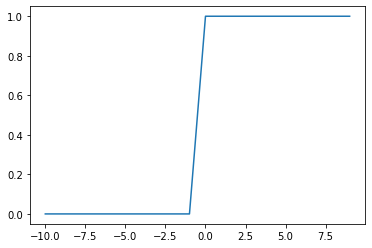

In [ ]:
plt.plot(np.arange(-10,10),step(np.arange(-10,10)))

In [ ]:
Xl=[]
x=X
x

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [ ]:
for L in range(2):
  x=step(np.dot(x,Al[L])+Bl[L])
  Xl.append(x)
print(Xl)

[array([[False,  True],
       [ True,  True],
       [ True,  True],
       [ True, False]]), array([[False],
       [ True],
       [ True],
       [False]])]


In [ ]:
Xoculta=step(np.dot(X,Al[0])+Bl[0])
Xoculta

array([[False,  True],
       [ True,  True],
       [ True,  True],
       [ True, False]])

In [ ]:
Xfinal=step(np.dot(Xoculta,Al[1])+Bl[1])
Xfinal

array([[False],
       [ True],
       [ True],
       [False]])

Ahora entrene una red neuronal usando Keras con la misma arquitectura pero usando función de activación ReLu

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [ ]:
modelo=Sequential([Dense(2,input_shape=(2,),activation='tanh'),Dense(1,activation='sigmoid')])

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo.compile(optimizer='sgd',loss='binary_crossentropy')

In [ ]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,0])

In [ ]:
modelo.fit(x=X,y=y,epochs=10000)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
1/1 [==============================] - 0s 6ms/step - loss: 0.1362
Epoch 7502/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1361
Epoch 7503/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1361
Epoch 7504/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1360
Epoch 7505/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1360
Epoch 7506/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1360
Epoch 7507/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1359
Epoch 7508/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1359
Epoch 7509/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1358
Epoch 7510/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1358
Epoch 7511/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1357
Epoch 7512/10000
1/1 [===============

In [ ]:
modelo.predict(X)

array([[0.05533899],
       [0.9155796 ],
       [0.90800226],
       [0.0457627 ]], dtype=float32)

# Arquitectura y funcionalidad de la Redes neuronales secuenciales:

De las funciones de activación habladas en la clase anterior podemos advertir dos características que deben poseer una red neuronal:

1. Las funciones de activación de las capas ocultas deben ser funciones de activación no lineales, con el fín de que la red actue como un **aproximador universal a una función**.
2. La función de activación de la capa de salida determina el tipo de clasificación/regresión del problema que se pretende solucionar.

Como regla general, se tiene que la función de activación de las capas ocultas puede ser definida como una función `ReLU` y, dependiendo del problema, podemos definir la función de activación de la capa de salida como:

* Función de activación sigmoide: si el problema de clasificación es binario.
* Función de activación Softmax: si el problema de clasificación es multiclase.
* Finción de activación lineal: si el problema se trata de una regresión.

En resumen, en la siguiente figura se ilustran la arquitectura de red de los problemas que pueden presentarse en la clasificación/regresión usando una red neuronal secuencial y las funciones de activación definidas en las capas que la componen.

<p><img alt="Colaboratory logo" height="300px" src="https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/archi_clas_reg.png?raw=true" align="center" hspace="10px" vspace="0px"></p>


Veamos a continuación, someramente y sin entrar en detalles, los tres problemas de clasificación/regresión que pueden abordarse, a saber, la clasificación binaria, la clasificación multiclase y la regresión.

# Clasificación Binaria:

**Objetivo:** Clasificación de reseñas de películas.

**Input:** Reseñas

**Output:** positiva o negativa.

**Base de datos:** Se usará un dataset de IMDB (Internet Movie Databased) el cual consta de 50000 reseñas altamente polarizadas. Estas reseñas se dividen en un conjunto de 25000 reseñas para entrenamiento  y 25000 reseñas de evaluación, cada una de las cuales consta de un 50% de reseñas positivas y un 50% de reseñas negativas. 

El dataset de IMBD se encuentra Keras. Este dataset ha sido previamente procesado, en ddonde, las reseñas (secuencia de palabras) ha sido transformada en una secuencia de enteros, en donde cada entero corresponde a una palabra específica en un diccionario.

In [ ]:
from tensorflow import keras
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
# Let's quickly decode a review

# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
#
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_review

1654784/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
len(train_data[1])

189

A continuación, se realiza un tratamiento de los datos con el fin de convertirlos a vectores de `numpy` que puedan ser usados en una red neuronal. Para mayor información de este paso, consultar el libro del creador de `keras` [Deep learning with python](http://faculty.neu.edu.cn/yury/AAI/Textbook/Deep%20Learning%20with%20Python.pdf)

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension)) # Creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # Sets specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data) # Vectorized training data

y_train = np.asarray(train_labels).astype('float32') # Vectorized training labels. 
y_test = np.asarray(test_labels).astype('float32') # Vectorized test labels.

In [ ]:
lista=[5,7,9,11,5]
l=vectorize_sequences(lista,dimension=12)
l

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [ ]:
len(train_data[1])

189

In [ ]:
x_train[1].shape

(10000,)

Definamos un modelo de dos capas ocultas, con funciones de activacióón **ReLU**, y una capa de salida con una función de activación **Sigmoide**, con el fin de abordar el problema de clasificación binario:

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                160016    
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512,validation_data=(x_test,y_test))


Epoch 1/4
49/49 [==============================] - 4s 66ms/step - loss: 0.4525 - accuracy: 0.8092 - val_loss: 0.3092 - val_accuracy: 0.8800
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2277 - accuracy: 0.9184 - val_loss: 0.2828 - val_accuracy: 0.8874
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.1674 - accuracy: 0.9413 - val_loss: 0.2961 - val_accuracy: 0.8829
Epoch 4/4
49/49 [==============================] - 1s 23ms/step - loss: 0.1327 - accuracy: 0.9553 - val_loss: 0.3267 - val_accuracy: 0.8765


In [ ]:
# Predicción del modelo:
result=model.predict(x_test)
result

array([[0.12365738],
       [0.99995697],
       [0.5757156 ],
       ...,
       [0.11920448],
       [0.05136106],
       [0.6352198 ]], dtype=float32)

In [ ]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0

y_pred

array([0., 1., 1., ..., 0., 0., 1.])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[11150,  1350],
       [ 1737, 10763]])

In [ ]:
p=cm[0,0]/(cm[0,0]+cm[0,1])
p

0.892

# Clasificación Multiclase:

**Objetivo:** Clasificación de un cable de noticias de un dataset de *Reuters*.

**Input:** Noticias.

**Output:** 46 topicos diferentes.

**Base de datos:** Cada topido tiene al menos 10 ejemplos en el set de entrenamiento

In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


A continuación, se realiza un tratamiento de los datos con el fin de convertirlos a vectores de `numpy` que puedan ser usados en una red neuronal. Para mayor información de este paso, consultar el libro del creador de `keras` [Deep learning with python](http://faculty.neu.edu.cn/yury/AAI/Textbook/Deep%20Learning%20with%20Python.pdf)

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46): 
    results = np.zeros((len(labels), dimension))

    for i, label in enumerate(labels):
        results[i, label] = 1.
        
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)



In [ ]:
train_labels[1]

4

In [ ]:
one_hot_train_labels[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
one_hot_train_labels[1]

Creemos a continuación una red neuronal con dos capas ocultas (de 64 neuroranas cada una), con funciones de activación **ReLU**, y una capa de salida con una función de activación **softmax**, con 46 neuronas, una por cada tópico:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 29ms/step - loss: 3.2353 - accuracy: 0.3408 - val_loss: 2.4484 - val_accuracy: 0.4840
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.9707 - accuracy: 0.5972 - val_loss: 1.6447 - val_accuracy: 0.6420
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.3987 - accuracy: 0.7002 - val_loss: 1.3138 - val_accuracy: 0.7000
Epoch 4/9
16/16 [==============================] - 0s 14ms/step - loss: 1.0860 - accuracy: 0.7607 - val_loss: 1.1409 - val_accuracy: 0.7460
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.8590 - accuracy: 0.8153 - val_loss: 1.0282 - val_accuracy: 0.7760
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6733 - accuracy: 0.8588 - val_loss: 0.9544 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5265 - accuracy: 0.8905 - val_loss: 0.9089 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 0.9686 - accuracy: 0.7854


Veamos los resultados de la evaluación del modelo:

In [ ]:
results

[0.9686025977134705, 0.7853962779045105]

Y procesamos a entender los resultados de la prediccióón para una de las instancias del conjunto de evaluación:

In [ ]:
# predicción.
predictions = model.predict(x_test)

In [ ]:
x_test.shape

(2246, 10000)

In [ ]:
predictions[0]

array([2.76799219e-05, 2.15246167e-04, 2.81058183e-05, 9.38935876e-01,
       5.02777845e-02, 5.27279417e-06, 2.37581771e-05, 1.44568085e-05,
       1.83941342e-03, 1.23431615e-04, 4.47988350e-05, 1.10362738e-03,
       1.83569457e-04, 2.23942930e-04, 4.10269713e-05, 9.90282388e-06,
       2.95415841e-04, 3.74162337e-05, 1.25665771e-04, 2.95304606e-04,
       2.79497728e-03, 1.35666822e-04, 7.01730301e-07, 9.27484507e-05,
       1.40408456e-05, 1.15425450e-04, 1.43943021e-06, 2.47374610e-05,
       3.23064378e-05, 2.22549061e-04, 4.10084467e-04, 4.94624192e-06,
       2.89260846e-04, 2.53361704e-05, 2.37607146e-05, 2.25726581e-05,
       1.88068982e-04, 1.63741825e-05, 2.79186297e-05, 1.13280059e-03,
       5.43768647e-06, 5.32419363e-04, 1.01610085e-05, 1.27351859e-05,
       7.81376002e-06, 3.99626697e-06], dtype=float32)

Para la predicción de la instancia 0, se tiene que el vector de salida tiene la siguiente forma:

In [ ]:
predictions[0].shape

(46,)

El vector tiene 46 entradas, que corresponden a las probabilidades de pertenencia a cada una de las 46 clases. La suma ade ellas debe ser uno:

In [ ]:
np.sum(predictions[0])

0.9999999

La clase más probable a la cual pertenece esta instancia es la clase:

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Regresión: Predicción de los precios de una casa:

Usaremos el dataset de los precios de casas en Bostón, para realizar la predicción.

El objetivo es obtener a la salida de la red neuronal un valor numérico del precio predicho en función de las caracteristicas de la tabla.

Definiremos un arquitectura de red con dos capas ocultas de 64 neuronas, usando una funcióón de activación **ReLu**, en cada una, y una capa de salida de una neurona, con una función de **activación lineal**:

In [ ]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [ ]:
train_targets[0]

15.2

- crim - Crimen per cápita por ciudad
- zn - proporción de terrenos residenciales divididos en zonas para -lotes de más de 25,000 pies cuadrados (Que tan lleno esta un lote)
- indus - proporción de acres de negocios no minoristas por ciudad
- chas - variable ficticia de Charles River (= 1 si el tramo limita - el río, 0 de lo contrario)
- nox - concentración de óxidos nítricos (partes por 10 millones)
- rm - número promedio de habitaciones por vivienda
- age - proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- dis - Distancias desproporcionadas a cinco centros de empleo de Boston
- rad - índice de accesibilidad a las autopistas radiales
- tax - tasa de impuesto a la propiedad de valor completo por USD 10,000
- ptratio - colegios por localidad
- black (B - 0,63)^ 2, donde B es la proporción de negros por ciudad
- lstat - porcentaje de estado inferior de la población
- medv - valor mediano de las viviendas ocupadas por sus propietarios en USD 1000

In [ ]:
# normalización de los datos
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std


In [ ]:
#Función para la definición del modelo
from keras import models
from keras import layers
def build_model(): 
  model = models.Sequential() 
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1)) #Función de activación lineal
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

In [ ]:
train_data.shape

(404, 13)

In [ ]:
# Creación del modelo
modelo = build_model()
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                896       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo.fit(train_data, train_targets, epochs=500, batch_size=16,validation_data=(test_data,test_targets))

Epoch 1/500
26/26 [==============================] - 1s 9ms/step - loss: 498.9410 - mae: 20.1403 - val_loss: 447.0487 - val_mae: 18.8555
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 345.0690 - mae: 16.0010 - val_loss: 258.4385 - val_mae: 13.9613
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 162.5394 - mae: 10.2926 - val_loss: 94.9792 - val_mae: 7.8704
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 65.2820 - mae: 6.1740 - val_loss: 56.3050 - val_mae: 5.8839
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 39.6845 - mae: 4.7406 - val_loss: 38.5878 - val_mae: 4.9371
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 28.4340 - mae: 3.9611 - val_loss: 31.6970 - val_mae: 4.4721
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 22.7932 - mae: 3.4682 - val_loss: 27.6852 - val_mae: 4.0944
Epoch 8/500
26/26 [==============================] - 0s 4ms

In [ ]:
## Predicciones
preds = modelo.predict(test_data)
preds[:5] ## Primeras 5 predicciones

array([[ 7.8907976],
       [19.45946  ],
       [20.604479 ],
       [36.85497  ],
       [23.352654 ]], dtype=float32)

In [ ]:
test_targets[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

In [ ]:
modelo.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 6ms/step - loss: 21.2332 - mae: 3.1106


[21.23318099975586, 3.1106295585632324]

# Ejemplo 1: Calssificacion binaria 
objetivo : predecir si las personas tienen o no una enfermedad del corazon.

Importmeos algunas de las librerias que nos seran de utilidad

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Primero importemos el dataset que se encuentran en Github

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/heart.csv')

Inspeccionemos el dataset y sus características

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Content

Attribute Information:
It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target: Heart disease (0 = no, 1 = yes)

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

Renombremos las columnas del dataset 


In [ ]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

Ahora procedamos a analizar un poco el dataset con algunos gráficos simples que nos darán una idea del problema

In [ ]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain_type            303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null int64
rest_ecg                   303 non-null int64
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null int64
st_depression              303 non-null float64
st_slope                   303 non-null int64
num_major_vessels          303 non-null int64
thalassemia                303 non-null int64
target                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1    165
0    138
Name: target, dtype: int64


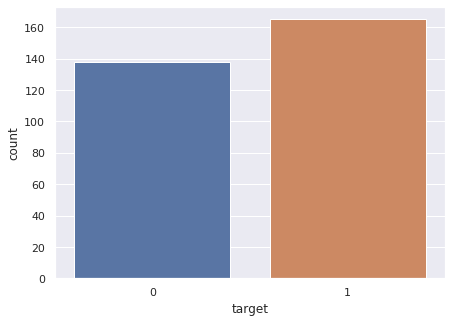

In [ ]:
print(data.target.value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x='target', data=data)

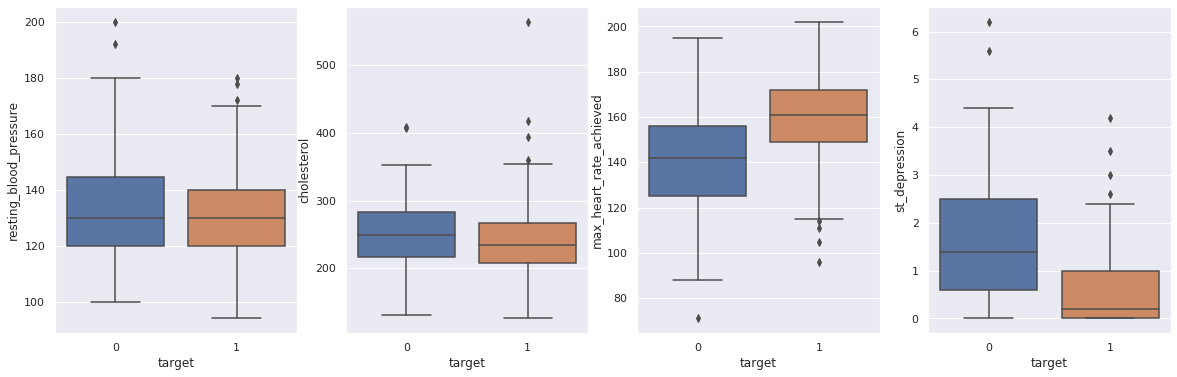

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(20,6))
sns.boxplot(x='target',y='resting_blood_pressure' ,data=data, ax=ax[0])
sns.boxplot(x='target',y='cholesterol' ,data=data,ax=ax[1])
sns.boxplot(x='target',y='max_heart_rate_achieved' ,data=data,ax=ax[2])
sns.boxplot(x='target',y='st_depression' ,data=data,ax=ax[3])

(14.0, 0.0)

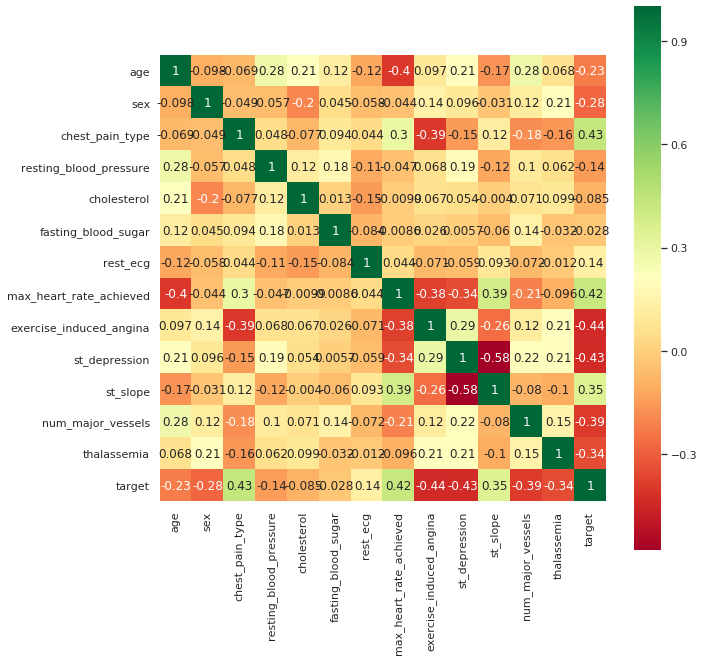

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', square=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

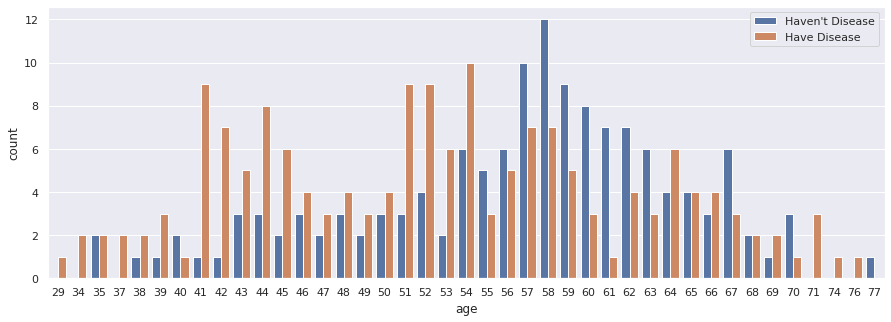

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='age', data=data, hue='target')
plt.legend(["Haven't Disease", "Have Disease"],loc='upper right')

In [ ]:
def plot_count_bar(feature):
  fig, ax = plt.subplots(1,2,figsize=(10,7))
  sns.countplot(x=feature, data=data, hue='target', ax=ax[0])
  ax[0].legend(["Haven't Disease", "Have Disease"],loc='best')
  sns.barplot(x=feature, y='target', data=data,ax=ax[1])

In [ ]:
data['sex'] = data['sex'].map({0:'female', 1:'male'})

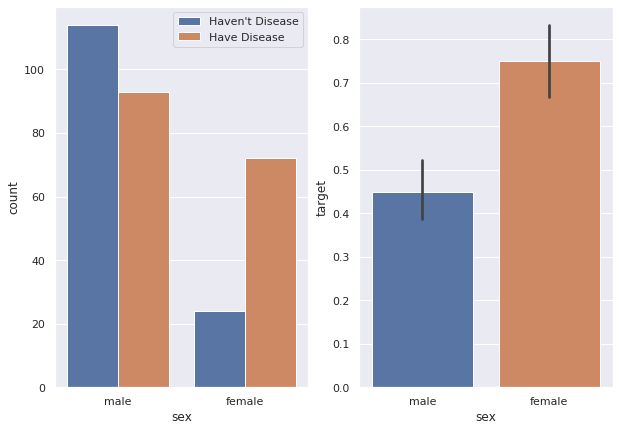

In [ ]:
plot_count_bar('sex')

In [ ]:
data['chest_pain_type'] = data['chest_pain_type'].map({0:'typical angina', 1:'atypical angina', 2:'non-anginal pain', 3:'asymptomatic'})

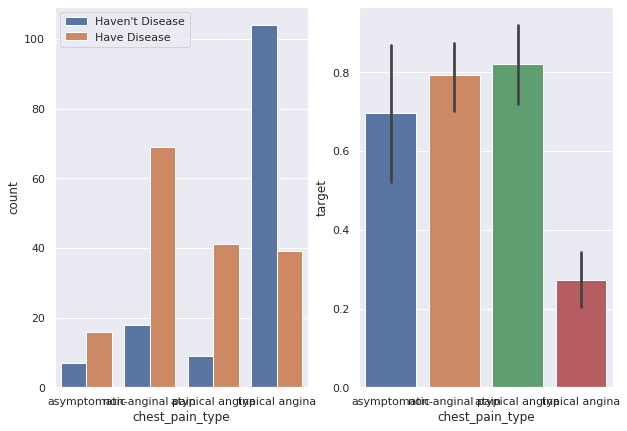

In [ ]:
plot_count_bar('chest_pain_type')

In [ ]:
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].map({0:'lower than 120mg/ml',1:'greater than 120mg/ml'})

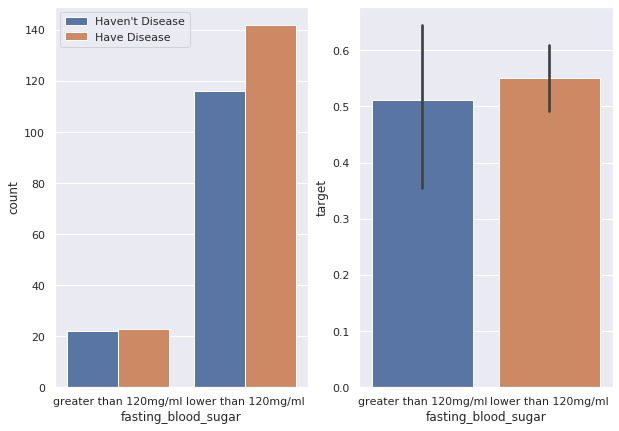

In [ ]:
plot_count_bar('fasting_blood_sugar')

In [ ]:
data['rest_ecg'] = data['rest_ecg'].map({0:'normal', 1 : 'ST-T abnormality', 2:'hypertrophy'})

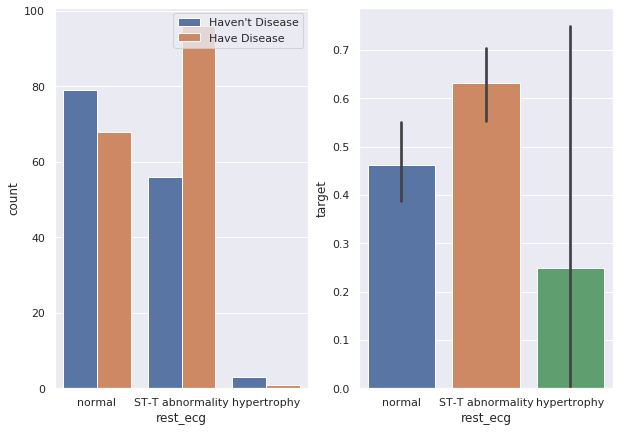

In [ ]:
plot_count_bar('rest_ecg')

In [ ]:
data['exercise_induced_angina'] = data['exercise_induced_angina'].map({0:'no', 1 : 'yes'})

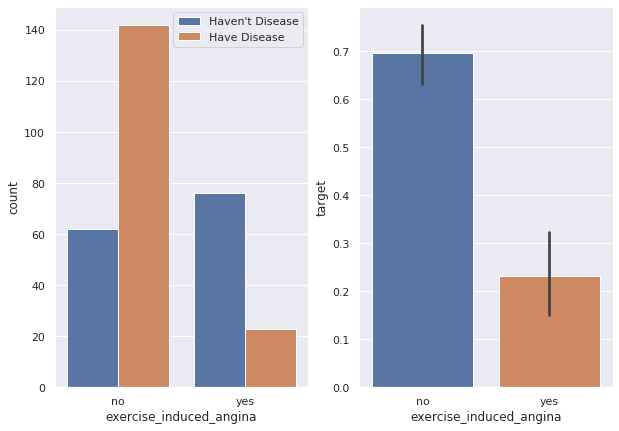

In [ ]:
plot_count_bar('exercise_induced_angina')

In [ ]:
data['st_slope'] = data['st_slope'].map({0: 'upsloping',  1: 'flat', 2: 'downsloping'})

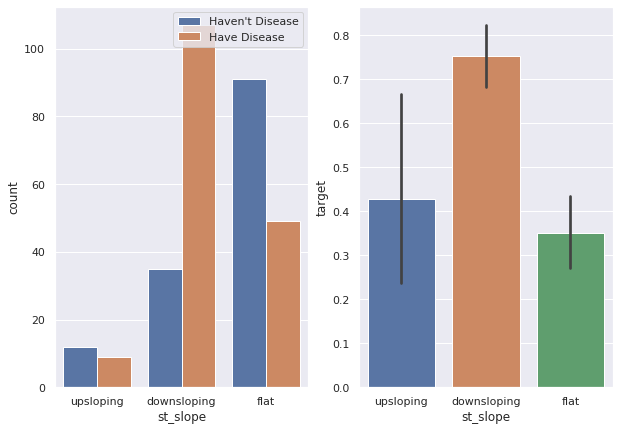

In [ ]:
plot_count_bar('st_slope')

In [ ]:
data['thalassemia'] = data['thalassemia'].map({1 :'normal', 2 : 'fixed defect', 3 :'reversable defect'})

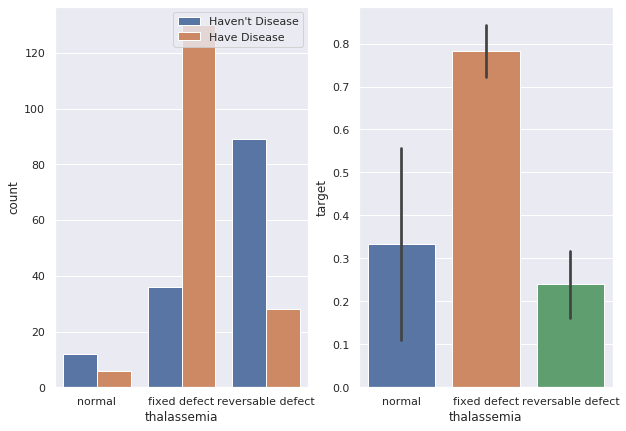

In [ ]:
plot_count_bar('thalassemia')

In [ ]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T abnormality,163,yes,0.6,downsloping,0,fixed defect,1


In [ ]:
X=data.iloc[:,:-1]
y=data['target']

In [ ]:
X=pd.get_dummies(X)

In [ ]:
X.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_greater than 120mg/ml,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_ST-T abnormality,rest_ecg_hypertrophy,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0
1,37,130,250,187,3.5,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0
2,41,130,204,172,1.4,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
3,56,120,236,178,0.8,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0


In [ ]:
X.shape

(303, 25)

Creemos ahora un set de entrenamieto y otro de testeo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(242, 25)

Recordemos como son implementados los pipelines usando sklearn. Para estos utilizareos el modelo de regression logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = Pipeline((
    ('scale', StandardScaler()), ('log_reg',LogisticRegression(C=10, solver='lbfgs', n_jobs=-1, fit_intercept=True))
))

In [ ]:
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=-1, penalty='l2',
                                    random_state=None, solver='lbfgs',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
y_fit=model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_fit))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



(2.0, 0.0)

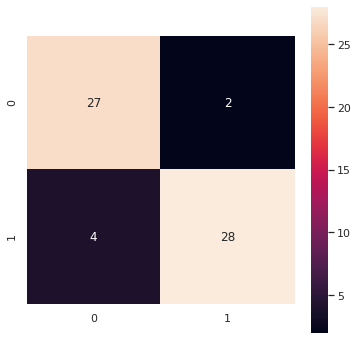

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_fit), annot=True, square=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

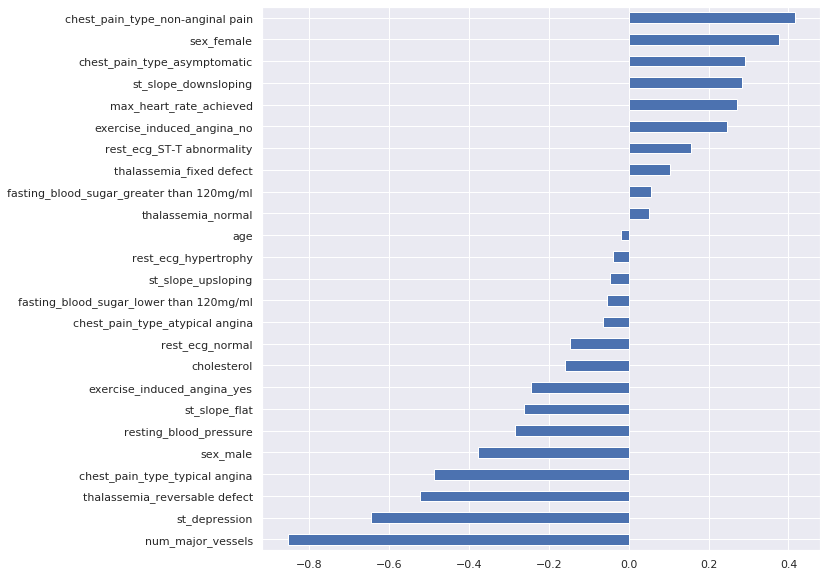

In [ ]:
plt.figure(figsize=(10,10))
pd.Series((model[1].coef_[0]), index=X_train.columns).sort_values().plot(kind='barh')

Recordemos que además la búsqueda de hyperparameters puede automatizarse con sklearn usando `gridsearchcv` o `randomsearchcv`


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = {
    'log_reg__C':np.linspace(1,100,5),
    'log_reg__fit_intercept': [True,False]
}

In [ ]:
grid_result = GridSearchCV(model, grid_params, n_jobs=-1, cv=5, iid=False)

In [ ]:
grid_result.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('log_reg',
                                        LogisticRegression(C=10,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='wa

In [ ]:
grid_result.best_params_

{'log_reg__C': 1.0, 'log_reg__fit_intercept': True}

In [ ]:
model = grid_result.best_estimator_

In [ ]:
y_fit=model.predict(X_test)
print(classification_report(y_test,y_fit))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



## Ahora usemos keras para crear un modelo de redes neururonales 

In [ ]:
from tensorflow import keras

Antes de usar los pipelines en keras recordemso como hemos estado trabajando. primero debemos escalar los datos

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [ ]:
keras.backend.clear_session()

Ahora construyamos nuestra red neuronal de capas densas

In [ ]:
model = keras.models.Sequential([
     keras.layers.Dense(5, activation='relu', input_shape = X_train.shape[1:]),    
     keras.layers.Dense(5, activation='relu'), 
     keras.layers.Dense(1 , activation='sigmoid')   
                             
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


pasemos a compilar el modelo

In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


y finalmente entrenemos el modelo

In [ ]:
model.fit(X_train_scaled,y_train, epochs=50, validation_split=0.2)

Train on 193 samples, validate on 49 samples
Epoch 1/50
193/193 [==============================] - 1s 4ms/sample - loss: 0.7280 - acc: 0.5648 - val_loss: 0.6873 - val_acc: 0.5714
Epoch 2/50
193/193 [==============================] - 0s 209us/sample - loss: 0.7096 - acc: 0.5596 - val_loss: 0.6805 - val_acc: 0.5918
Epoch 3/50
193/193 [==============================] - 0s 145us/sample - loss: 0.7025 - acc: 0.5492 - val_loss: 0.6730 - val_acc: 0.5714
Epoch 4/50
193/193 [==============================] - 0s 158us/sample - loss: 0.6956 - acc: 0.5492 - val_loss: 0.6666 - val_acc: 0.5918
Epoch 5/50
193/193 [==============================] - 0s 141us/sample - loss: 0.6894 - acc: 0.5544 - val_loss: 0.6617 - val_acc: 0.6122
Epoch 6/50
193/193 [==============================] - 0s 156us/sample - loss: 0.6835 - acc: 0.5751 - val_loss: 0.6576 - val_acc: 0.6327
Epoch 7/50
193/193 [==============================] - 0s 139us/sample - loss: 0.6782 - acc: 0.5803 - val_loss: 0.6536 - val_acc: 0.6327
Epoch

In [ ]:
y_fit=model.predict_classes(X_test_scaled)
print(classification_report(y_test,y_fit))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.83      0.91      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



Ahora usemos keras junto a sklear para automatizar este proceso de escalado y ademas para automatizar la busqueda de hyperparametros como se hizo con la regresion logistica

In [ ]:
keras.backend.clear_session()

El primer paso es crear una funcion que constriuira y compilara el modelo de Keras dado un conjunto de hyperparametros

In [ ]:
def build_model(n_neurons=5,input_shape=(25,)):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))
  model.add(keras.layers.Dense(n_neurons, activation='relu' ))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
  return model

Ahora creemos un `KerasClassifier` basados en la funcion build_model

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100, validation_split=0.2)

Ahora podemos pasar a usar este objeto como un modelo usual de clasificacion en Sklearn

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
model.fit(X_train,y_train)

Train on 193 samples, validate on 49 samples
Epoch 1/100
193/193 [==============================] - 0s 553us/sample - loss: 0.7842 - acc: 0.4611 - val_loss: 0.7446 - val_acc: 0.5102
Epoch 2/100
193/193 [==============================] - 0s 182us/sample - loss: 0.7330 - acc: 0.4922 - val_loss: 0.7284 - val_acc: 0.5306
Epoch 3/100
193/193 [==============================] - 0s 168us/sample - loss: 0.7166 - acc: 0.5285 - val_loss: 0.7117 - val_acc: 0.5306
Epoch 4/100
193/193 [==============================] - 0s 162us/sample - loss: 0.7009 - acc: 0.5389 - val_loss: 0.6977 - val_acc: 0.5714
Epoch 5/100
193/193 [==============================] - 0s 146us/sample - loss: 0.6867 - acc: 0.5699 - val_loss: 0.6817 - val_acc: 0.6122
Epoch 6/100
193/193 [==============================] - 0s 146us/sample - loss: 0.6723 - acc: 0.5699 - val_loss: 0.6704 - val_acc: 0.6122
Epoch 7/100
193/193 [==============================] - 0s 143us/sample - loss: 0.6606 - acc: 0.5803 - val_loss: 0.6553 - val_acc: 0.5

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ann',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f4250759780>)],
         verbose=False)

In [ ]:
y_fit=model.predict(X_test)
print(classification_report(y_test,y_fit))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Ahora pasemos buscar cual seria el mejor numero de capas ocultas, neuronas por capa oculta y batch_size

In [ ]:
keras.backend.clear_session()

In [ ]:
def build_model(n_hidden=1, n_neurons=5,input_shape=(25,)):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))
  for i in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=50, verbose=0)

In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
params = {
    'ann__n_hidden':[0,1,2,3],
    'ann__n_neurons':np.arange(0,15),
    'ann__batch_size':[10,15,20]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rnd_search = RandomizedSearchCV(model, params, n_iter=50, n_jobs=-1, cv=3, scoring='accuracy')

In [ ]:
grid_result = rnd_search.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
grid_result.best_params_

{'ann__batch_size': 20, 'ann__n_hidden': 0, 'ann__n_neurons': 8}

In [ ]:
sk_params = {
    'batch_size':grid_result.best_params_['ann__batch_size'],
    'n_hidden': grid_result.best_params_['ann__n_hidden'],
    'n_neurons':grid_result.best_params_['ann__n_neurons']
}

In [ ]:
sk_params

{'batch_size': 20, 'n_hidden': 0, 'n_neurons': 8}

In [ ]:
keras.backend.clear_session()

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=50, verbose=1, **sk_params )

In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
model.fit(X_train,y_train)

Train on 242 samples
Epoch 1/50
242/242 [==============================] - 0s 346us/sample - loss: 0.6386 - acc: 0.6405
Epoch 2/50
242/242 [==============================] - 0s 156us/sample - loss: 0.6119 - acc: 0.6777
Epoch 3/50
242/242 [==============================] - 0s 175us/sample - loss: 0.5935 - acc: 0.6860
Epoch 4/50
242/242 [==============================] - 0s 168us/sample - loss: 0.5761 - acc: 0.7190
Epoch 5/50
242/242 [==============================] - 0s 275us/sample - loss: 0.5583 - acc: 0.7314
Epoch 6/50
242/242 [==============================] - 0s 185us/sample - loss: 0.5455 - acc: 0.7479
Epoch 7/50
242/242 [==============================] - 0s 170us/sample - loss: 0.5332 - acc: 0.7521
Epoch 8/50
242/242 [==============================] - 0s 174us/sample - loss: 0.5211 - acc: 0.7438
Epoch 9/50
242/242 [==============================] - 0s 170us/sample - loss: 0.5107 - acc: 0.7562
Epoch 10/50
242/242 [==============================] - 0s 206us/sample - loss: 0.4994 - 

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ann',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f42506b1e48>)],
         verbose=False)

61/61 [==============================] - 0s 271us/sample
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



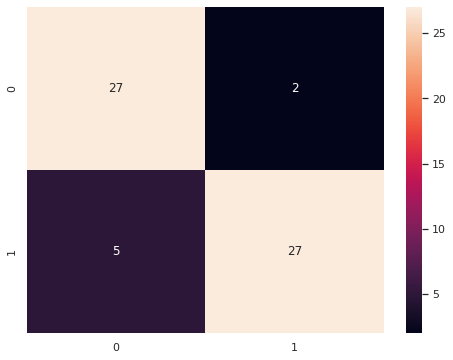

In [ ]:
y_fit=model.predict(X_test)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_fit), annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
print(classification_report(y_test,y_fit))

# Ejemplo 2: clasificacion multicalse 
Objetivo: predecir entre 6 tipos de vridiros diferentes apartir de su composicion quimica 

Importmeos algunas de las librerias que nos seran de utilidad

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Imortemos los datos desde el repositorio de github

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/glass.csv')

Inspeccionemos el dataset y sus características

In [ ]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
data.shape

(214, 10)

In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Ahora procedamos a analizar un poco el dataset con algunos gráficos simples que nos darán una idea del problema

(10.0, 0.0)

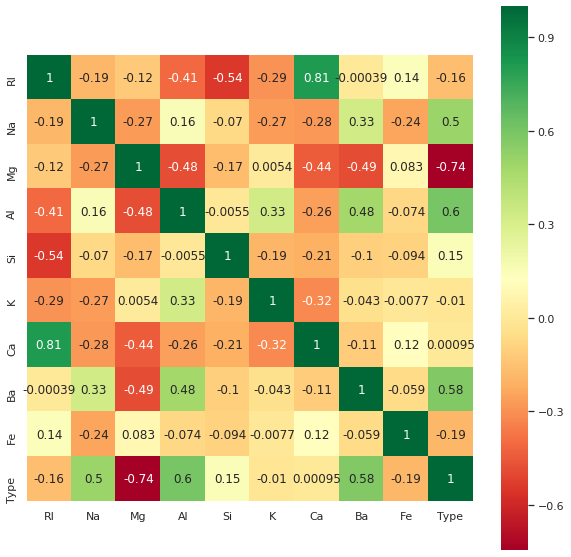

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', square=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


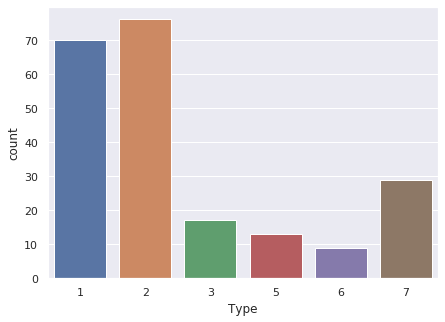

In [ ]:
print(data.Type.value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x='Type', data=data);

In [ ]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

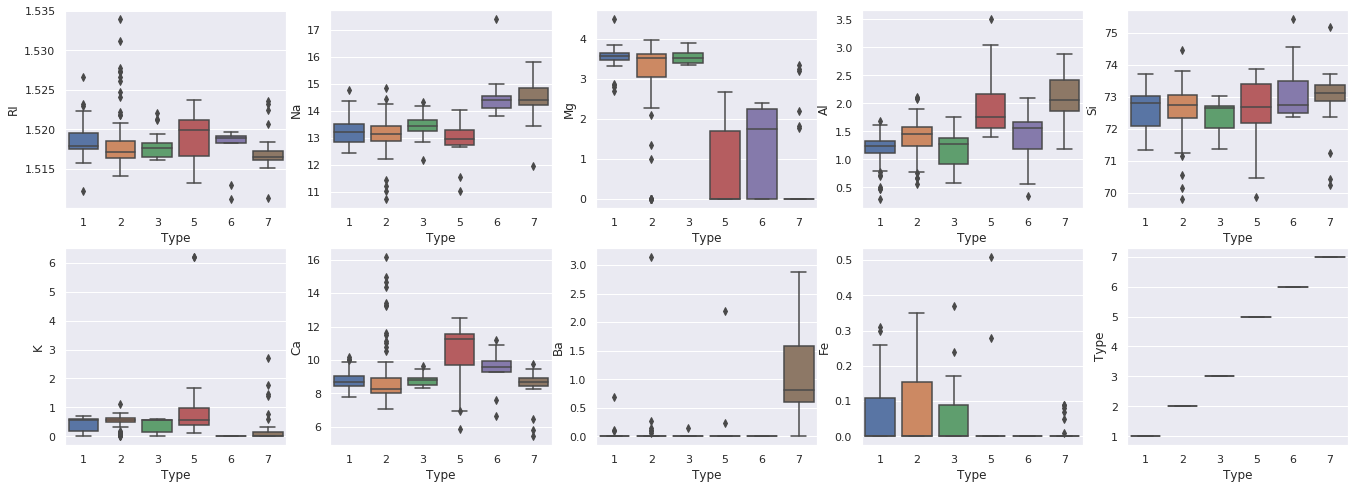

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(23,8))
names=data.columns
for i , ax in enumerate(ax.flat):  
  sns.boxplot(data=data, x='Type', y=names[i] , orient='vertical' , ax=ax)

Como vemos hay varios Outliers. Identifiquemos y removamos estos Outliers usando el metodo del interquartile range (IQR)

In [ ]:
def IQR(x, value=1.5):
  Q1 = np.nanpercentile(x,25)
  Q3 = np.nanpercentile(x,75)
  IQR = Q3 - Q1
  upper = Q3 + value*IQR
  lower = Q1 - value*IQR
  x[x > upper] = np.nan
  x[x < lower] = np.nan
  return x

In [ ]:
for i in data.columns[:-1]:
  for j in data['Type'].unique():
    data.loc[data['Type']==j, i]=IQR(data.loc[data['Type']==j, i])

La estrategia implementada para remplazar estos Outliers sera usar el promedi

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
for i in data['Type'].unique():  
  data.loc[data['Type']==i,'RI':'Fe']=imp.fit_transform(data.loc[data['Type']==i,'RI':'Fe'])

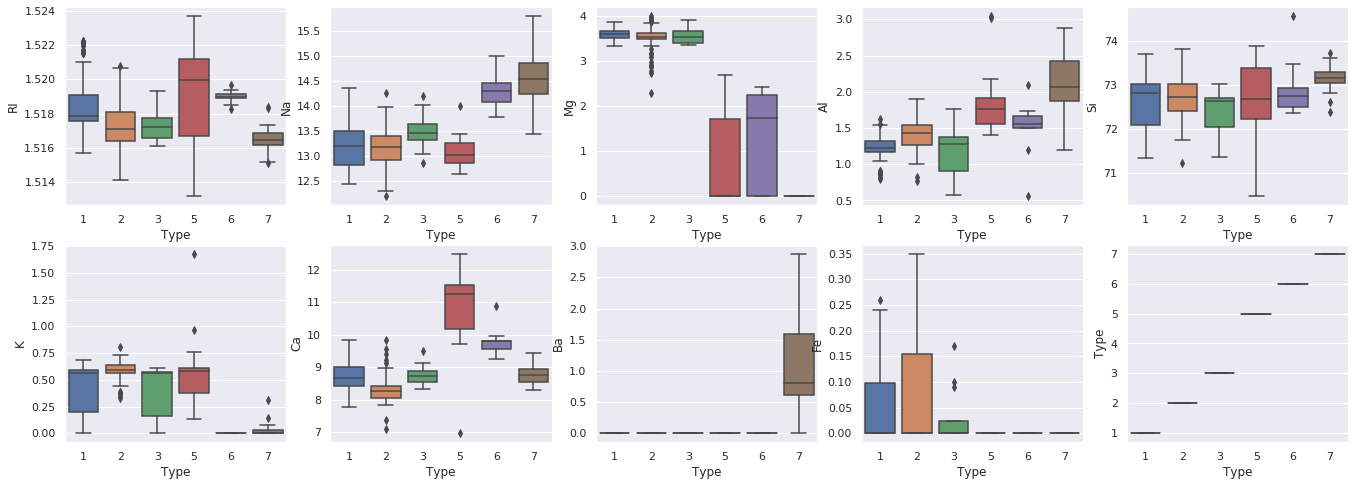

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(23,8))
names=data.columns
for i , ax in enumerate(ax.flat):  
  sns.boxplot(data=data, x='Type', y=names[i] , orient='vertical' , ax=ax)

Como es usual separemos nuestro datos en entrenemaiento y testeo

In [ ]:
X=data.iloc[:,:-1]
y=data['Type']

In [ ]:
X.shape

(214, 9)

In [ ]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,3.583846,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.600000,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.550000,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.690000,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.620000,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(171, 9)

Ahora procedamos a implementar nuestro modelo de redes neuronales. Usaremos validacion curazada y RandomSearchCv para buscar los hyperparametros de nuetro modelo 

In [ ]:
from tensorflow import keras

In [ ]:
keras.backend.clear_session()

In [ ]:
def build_model(n_neurons=55, n_hidden=2, input_shape=(9,)):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))
  for i in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(6, activation='softmax'))
  model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100, verbose=1)

In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
params = {
    'ann__n_hidden':[0,1,2,3],
    'ann__n_neurons':np.arange(45,60),
    'ann__batch_size':[10,15,20]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rnd_search = RandomizedSearchCV(model, params, n_iter=50, n_jobs=-1, cv=3, scoring='accuracy')

In [ ]:
grid_result = rnd_search.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Train on 171 samples
Epoch 1/100
171/171 [==============================] - 0s 476us/sample - loss: 1.7455 - acc: 0.2105
Epoch 2/100
171/171 [==============================] - 0s 256us/sample - loss: 1.6525 - acc: 0.3450
Epoch 3/100
171/171 [==============================] - 0s 266us/sample - loss: 1.5667 - acc: 0.4678
Epoch 4/100
171/171 [==============================] - 0s 238us/sample - loss: 1.4945 - acc: 0.5322
Epoch 5/100
171/171 [==============================] - 0s 262us/sample - loss: 1.4245 - acc: 0.5205
Epoch 6/100
171/171 [==============================] - 0s 273us/sample - loss: 1.3478 - acc: 0.5614
Epoch 7/100
171/171 [==============================] - 0s 261us/sample - loss: 1.2742 - acc: 0.5789
Epoch 8/100
171/171 [==============================] - 0s 266us/sample - loss: 1.2069 - acc: 0.6082
Epoch 9/100
171/171 [==============================] - 0s 254us/sample - loss: 1.1474 - acc: 0.5906
Epoch 10/100
171/171 [==============================] - 0s 288us/sample - loss:

In [ ]:
grid_result.best_params_

{'ann__batch_size': 10, 'ann__n_hidden': 2, 'ann__n_neurons': 53}

In [ ]:
sk_params = {
    'batch_size':grid_result.best_params_['ann__batch_size'],
    'n_hidden': grid_result.best_params_['ann__n_hidden'],
    'n_neurons':grid_result.best_params_['ann__n_neurons']
}

In [ ]:
sk_params

{'batch_size': 10, 'n_hidden': 2, 'n_neurons': 53}

In [ ]:
keras.backend.clear_session()

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100 , verbose=1, **sk_params)

In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
model.fit(X_train,y_train)

Train on 171 samples
Epoch 1/100
171/171 [==============================] - 0s 499us/sample - loss: 1.7100 - acc: 0.4444
Epoch 2/100
171/171 [==============================] - 0s 263us/sample - loss: 1.6111 - acc: 0.6082
Epoch 3/100
171/171 [==============================] - 0s 249us/sample - loss: 1.5156 - acc: 0.6491
Epoch 4/100
171/171 [==============================] - 0s 231us/sample - loss: 1.4212 - acc: 0.6491
Epoch 5/100
171/171 [==============================] - 0s 298us/sample - loss: 1.3283 - acc: 0.6667
Epoch 6/100
171/171 [==============================] - 0s 308us/sample - loss: 1.2475 - acc: 0.6608
Epoch 7/100
171/171 [==============================] - 0s 278us/sample - loss: 1.1721 - acc: 0.6608
Epoch 8/100
171/171 [==============================] - 0s 247us/sample - loss: 1.1169 - acc: 0.6608
Epoch 9/100
171/171 [==============================] - 0s 363us/sample - loss: 1.0616 - acc: 0.6608
Epoch 10/100
171/171 [==============================] - 0s 264us/sample - loss:

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ann',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7faf94b2afd0>)],
         verbose=False)

43/43 [==============================] - 0s 481us/sample
              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       0.90      0.64      0.75        14
           3       0.50      0.67      0.57         3
           5       0.75      0.75      0.75         4
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         8

    accuracy                           0.79        43
   macro avg       0.80      0.77      0.77        43
weighted avg       0.82      0.79      0.79        43



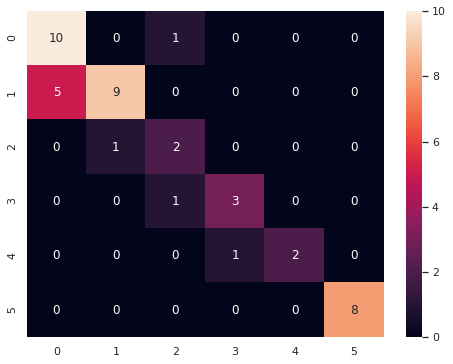

In [ ]:
y_fit=model.predict(X_test)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_fit), annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)
print(classification_report(y_test,y_fit))

Comparemos los resultados obtneido con un el modelo de regression SoftMax

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
model = Pipeline((
            ('scale', StandardScaler())  , ('log_reg', LogisticRegression( multi_class='multinomial', solver='lbfgs', C=30, max_iter=500, ))
))

In [ ]:
grid_params= {
    'log_reg__C':np.arange(1,50),
    'log_reg__class_weight':['balanced', None]
}

In [ ]:
grid_result = GridSearchCV(estimator=model, param_grid=grid_params, n_jobs=-1, cv=5)
grid_result.fit(X_train,y_train)
print(grid_result.best_params_)
model=grid_result.best_estimator_

{'log_reg__C': 1, 'log_reg__class_weight': None}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.77      0.71      0.74        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.81        43
   macro avg       0.74      0.74      0.74        43
weighted avg       0.78      0.81      0.79        43



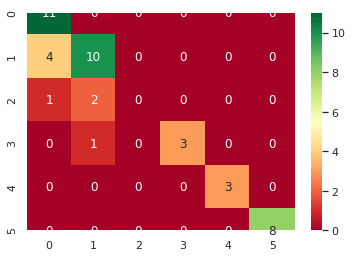

In [ ]:
model.fit(X_train,y_train)
y_fit=model.predict(X_test)
print(classification_report(y_test,y_fit))
sns.heatmap(confusion_matrix(y_test,y_fit), annot=True, cmap='RdYlGn')

# Ejemplo 3: Regression 
Objetivo: predecir el precio de casas en la ciuidad de california 

importemos algunas de las ligrerais que nos seran de utilidad


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import seaborn as sns; sns.set()

importemos el dataset usando keras

In [ ]:
housing = fetch_california_housing()

Inspeccionemos el dataset y sus características

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [ ]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='Price')

In [ ]:
X.shape

(20640, 8)

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

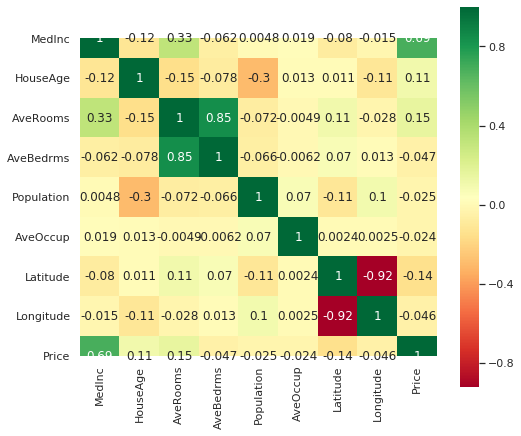

In [ ]:
plt.figure(figsize=(8,7))
sns.heatmap(X.join(y).corr(), square=True, annot=True, cmap='RdYlGn')

Separemos nuestros datos en un set de entrenamiento y otro de testeo

In [ ]:
X_train , X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2)

In [ ]:
X_train.shape

(16512, 8)

Ahora procedamos a implementar nuestro modelo de redes neuronales. Usaremos validacion curazada y RandomSearchCv para buscar los hyperparametros de nuetro modelo 

In [ ]:
from tensorflow import keras

In [ ]:
keras.backend.clear_session()

In [ ]:
def build_model(n_neurons=5, n_hidden=2, input_shape=(8,)):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))
  for i in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation='relu'))
  model.add(keras.layers.Dense(1))
  model.compile(optimizer='sgd', loss='mean_squared_error')
  return model

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model, epochs=30, verbose=1, validation_split=0.5)

In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
params = {
    'ann__n_hidden':[0,1,2,3],
    'ann__n_neurons':np.arange(20,40),
    'ann__batch_size':[10,15,20,25]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rnd_search = RandomizedSearchCV(model, params, n_iter=10, n_jobs=-1, cv=3)

In [ ]:
grid_result = rnd_search.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train on 8256 samples, validate on 8256 samples
Epoch 1/30
8256/8256 [==============================] - 3s 391us/sample - loss: 1.5569 - val_loss: 0.5057
Epoch 2/30
8256/8256 [==============================] - 3s 381us/sample - loss: 0.4399 - val_loss: 11.6794
Epoch 3/30
8256/8256 [==============================] - 3s 377us/sample - loss: 1.1178 - val_loss: 0.6253
Epoch 4/30
8256/8256 [==============================] - 3s 378us/sample - loss: 0.4662 - val_loss: 0.4139
Epoch 5/30
8256/8256 [==============================] - 3s 386us/sample - loss: 0.4707 - val_loss: 0.9279
Epoch 6/30
8256/8256 [==============================] - 3s 380us/sample - loss: 0.5470 - val_loss: 0.3828
Epoch 7/30
8256/8256 [==============================] - 3s 387us/sample - loss: 0.3995 - val_loss: 0.3775
Epoch 8/30
8256/8256 [==============================] - 3s 380us/sample - loss: 0.3774 - val_loss: 0.3523
Epoch 9/30
8256/8256 [==============================] - 3s 378us/sample - loss: 0.3606 - val_loss: 0.36

In [ ]:
grid_result.best_params_

{'ann__batch_size': 10, 'ann__n_hidden': 1, 'ann__n_neurons': 27}

In [ ]:
sk_params = {
    'batch_size':grid_result.best_params_['ann__batch_size'],
    'n_hidden': grid_result.best_params_['ann__n_hidden'],
    'n_neurons':grid_result.best_params_['ann__n_neurons']
}

In [ ]:
sk_params

{'batch_size': 10, 'n_hidden': 1, 'n_neurons': 27}

In [ ]:
keras.backend.clear_session()

In [ ]:
keras_cs = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model, epochs=20 , verbose=0, **sk_params)

In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [ ]:
model.fit(X_train, y_train);
y_fit = model.predict(X_test);
print(mean_squared_error(y_test,y_fit))
r2_score(y_test, y_fit )

0.30806602270209443


0.7655696445677386

Comparemos ahora el desempeño de nuestro red neuronal modelo con un regresion lineal 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('linear_model', LinearRegression())
])

In [ ]:
model.fit(X_train,y_train)
y_fit =  model.predict(X_test)
print(mean_squared_error(y_test,y_fit))
r2_score(y_test,y_fit)

0.5228432049485254


0.6021297081179469

#Ejercicio Clasificación biclase
En éste ejercicio usaremos una red densa para hacer una clasificación biclase para el sentimiento de la reseña de películas de la base de datos IMDB, con label 0 (negativo) y 1 (positivo).

En el dataset se encuentran una reseña en texto para una película así como su sentimiento, la idea es construír un clasificador capaz de diferenciar reseñas positivas de negativas:

Bebe construír su modelo de la siguiente manera


1.   Importe las librerías necesarias (ya lo hemos hecho )
2.   Importe los datos de la base de datos del IMDB disponibles en Kereas (También lo hemos hecho.)
3.   Cree una red con tres capas: keras.layers.Embedding, ésta capa se encarga de codificar el texto (como el Tf-iDF en el curso 1).
  keras.layers.GlobalAveragePooling1D, ésta capa se encarga de promediar los valores de los vectores envevidos en la capa anterior para extraer la información relevante, y keras.layers.Dense que constará de una sola neurona (0 o 1) y una activación sigmoidal para la clasificación biclase.
4.  Compile el modelo usando entropía cruzada binaria como perdida y un optimizador 'adam', el cual es una forma modificada del SDG (optimizer='adam',loss='binary_crossentropy'), use 10 épocas
5.   Entrene su modelo y evalue la perdida y el accuracy. No olvide que los datos deben ser particionados en datos de entrenamiento y prueba.



from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
!pip install -q tensorflow-datasets
!pip install -q seaborn
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
!pip install -q tensorflow-datasets
!pip install -q seaborn
import tensorflow_datasets as tfds
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from keras import models
from keras import layers

In [ ]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    as_supervised=True,
    with_info=True)


In [ ]:
BUFFER_SIZE = 1000
BATCH_SIZE = 64

In [ ]:
train_data = train_data.shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_data))

In [ ]:
train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32, tf.compat.v1.data.get_output_shapes(train_data)))

In [ ]:
test_batches = (
    test_data
    .padded_batch(32,tf.compat.v1.data.get_output_shapes(test_data)))

In [ ]:
encoder = info.features['text'].encoder

In [ ]:
model = keras.Sequential([
  keras.layers.Embedding(encoder.vocab_size, 16),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(1, activation='sigmoid')])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          130960    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer ='adam',
              loss='binary_crossentropy',
              metrics = 'accuracy')

In [ ]:
entreno = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=10)

Epoch 1/10
782/782 [==============================] - 8s 6ms/step - loss: 0.6824 - accuracy: 0.6281 - val_loss: 0.6718 - val_accuracy: 0.6219
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.6214 - accuracy: 0.7552 - val_loss: 0.6129 - val_accuracy: 0.7344
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 0.5434 - accuracy: 0.8044 - val_loss: 0.5583 - val_accuracy: 0.7656
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.4753 - accuracy: 0.8389 - val_loss: 0.5092 - val_accuracy: 0.7906
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.4234 - accuracy: 0.8617 - val_loss: 0.4791 - val_accuracy: 0.8094
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3814 - accuracy: 0.8748 - val_loss: 0.4560 - val_accuracy: 0.8094
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3513 - accuracy: 0.8855 - val_loss: 0.4332 - val_accuracy: 0.8250
Epoch 

In [ ]:
loss, accuracy = model.evaluate(test_batches)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 0.3324 - accuracy: 0.8758
Loss:  0.3324158489704132
Accuracy:  0.875760018825531


# Ejercicio Clasificación multiclase

En éste caso usaremos la base de datos CIFAR10, la cual consta de imagenes a color, constituidas por 10 clases de objeto: ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']. Construirémos de nuevo una red densa para crear un clasificador de imagenes. 
Recuerde que la idea es generar un flujo de trabajo desde la carga de los datos hasta la evaluación del modelo.

1.  Realice la carga de los datos del CIFAR10 de Keras y normalice los datos. Recuerde que al ser imagenes los valores de los pixeles estarán entre 0 y 255.
2.  Visualice algunas imagenes de muestra y su label respectivo. Recuerde usar la función imshow del matplotlib.pyplot.
3.  Cree un modelo con 4 capas, keras.layers.Flatten, ésta es la capa de entrada y deberá recibir imagenes de 32x32 pixeles y 3 canales de color. Añada 2 capas densas con activación relu y 256 y 128 neuronas respectivamente, finalmente una capa densa de 10 neuronas (el numero de clases del dataset) y con una activación softmax encargada de distribuir las densidad de probabilidad entre todos los labels
4.  Recuerde compilar el modelo antes de entrenar. Hágalo con una sparse_categorical_crossentropy como función de perdida y de nuevo un optimizador adam.
5. Entrene y evalúe el modelo (recuerde usar datos diferentes para cada una de éstas tareas).
6.  Finalmente grafique de nuevo las imagenes como en el punto 2. pero ahora con la etiqueta determinada por la red.


In [ ]:
import tensorflow as tf

In [ ]:
#cargar el dataset
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#normalice los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

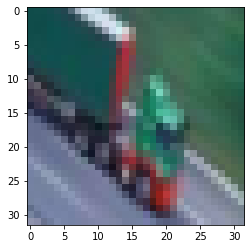

In [ ]:
plt.imshow(train_images[50])

In [ ]:
train_labels[50]

array([9], dtype=uint8)

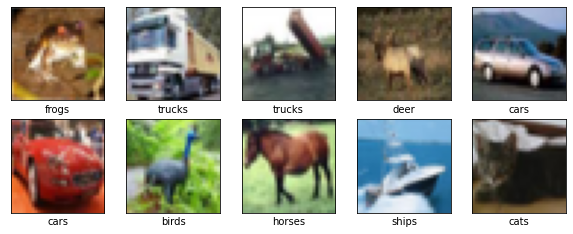

In [ ]:
class_names = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               786688    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8699 - accuracy: 0.3236
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6854 - accuracy: 0.3959
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6049 - accuracy: 0.4254
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5520 - accuracy: 0.4466
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5159 - accuracy: 0.4566
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4891 - accuracy: 0.4653
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4640 - accuracy: 0.4746
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4441 - accuracy: 0.4825
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4254 - accuracy: 0.4892
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.409

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.4678 - accuracy: 0.4813 - 780ms/epoch - 2ms/step

Test accuracy: 0.4812999963760376


313/313 [==============================] - 1s 4ms/step


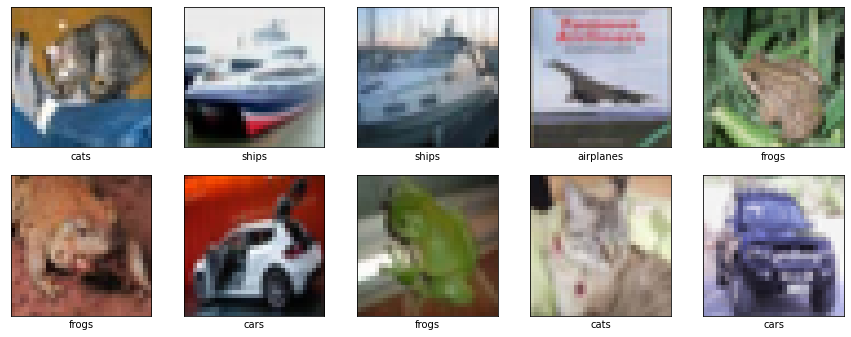

In [ ]:
prediction = model. predict(test_images)
plt.figure(figsize=(15,15))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i])
  plt.xlabel(class_names[test_labels[i][0]])
plt.show()

Note que las capas críticas en la red son:
las primeras encargadas de codificar los datos de una manera adecuada para la red. 
En el caso del texto usamos una red que codifica las palabras como vectores numéricos (igual que el caso del curso 1) y en las imagenes usamos una capa que aplana las imagenes como un vector para ingresarlo a la redy las capas finales que se diferencian por la función de activación y el numero de neuronas en la capa, ésto debe ser representativo del problema que  queremos solucionar.

Las capas intermedias son las encargadas de extraer la información de nuestros datos y la importancia de su variedad será evidente en ejercicios posteriores.